Data science individual project planning stage  
Name: Tianyu Zou  
Group: 004-34  
Selected question: Question 3  

In [10]:
library(tidyverse)

players <- read_csv("https://raw.githubusercontent.com/yulianazou11-hash/individual-project-planning-stage/aaffca612b227cdaceef2a3a86f46eb351c0b114/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/yulianazou11-hash/individual-project-planning-stage/aaffca612b227cdaceef2a3a86f46eb351c0b114/sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

1) The project uses two datasets: "players.csv" and "sessions.csv"
The "players.csv" file contains 196 observations and 7 variables, each representing a unique player.
The "sessions.csv" file contains 1535 observations and 5 variables, each representing one gameplay session.
In the players dataset, most variables are either numeric or categorical. For example, "age" and "played_hours" are numeric, while "gender" and "experience" are categorical. The "subscribe" variable indicating whether the player subscribed(TRUE) or not (FALSE). In the sessions dataset, the start and end times are stored as text.
Some potential dataset, the start and end times are stored as text. Some potential data issue include missing or incomplete information in "age" and "gender" as well as possible extreme values for players who played unusuall long hours.
On average, players are about 21 years old and have played for about 6 hours.

2) Can a plaer's experience level, gender, and total played hours predict whether they subscribe to the newsletter?  

To prepare for analysis, I plan to tidy the data by selecting these relevant columns from "players.csv", checking for missing or inconsistent values, and converting categorical variables into factors suitable for modelling.    
This cleaned dataset will then be used to apply a classification method to predict newsletter subscription.

In [21]:
player_summary <- players |>
summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
          ) |>
round(2)
player_summary

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


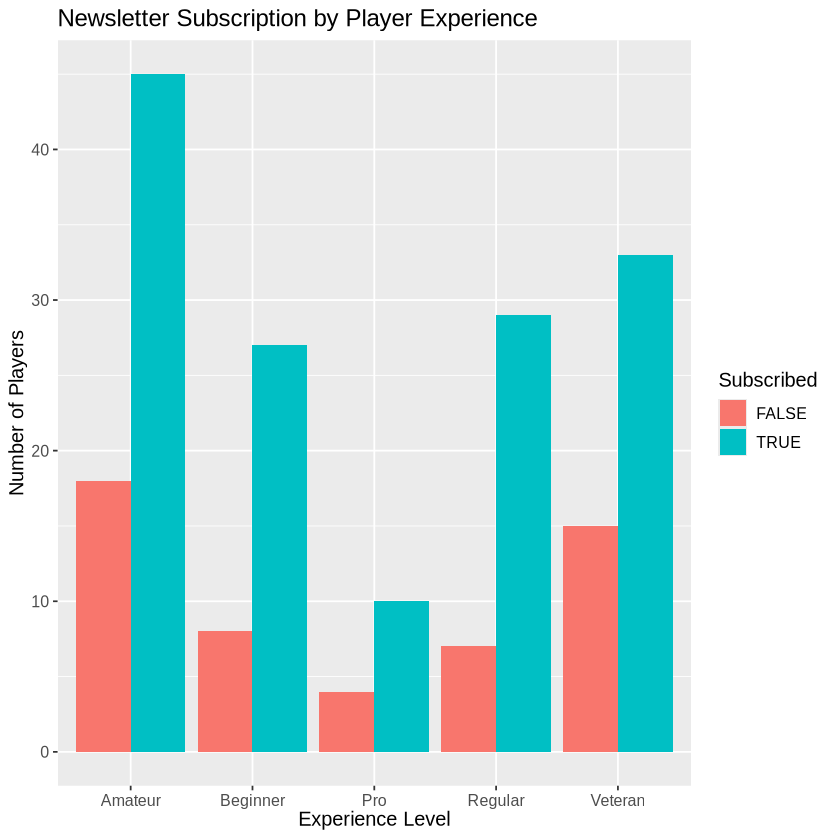

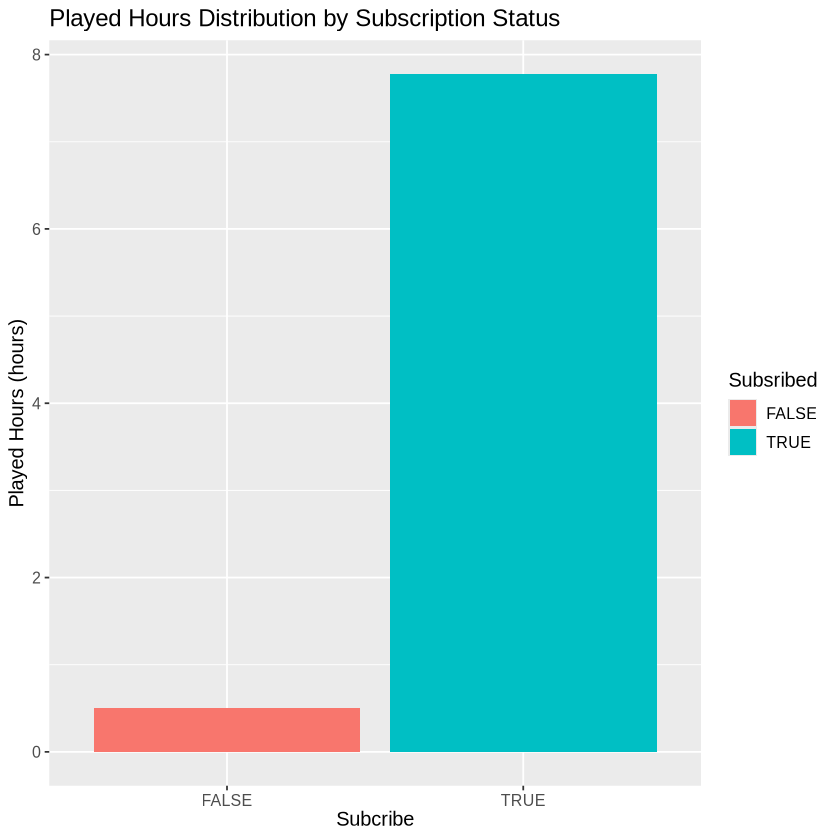

In [44]:
players_tidy <- players |>
select(experience, subscribe, played_hours,gender, Age)

players_plot1 <- ggplot(players_tidy, aes(x = experience, fill = subscribe)) +
geom_bar(position = "fill") +
labs(title = "Newsletter Subscription by Player Experience",
     x = "Experience Level",
     y = "Number of Players",
     fill = "Subscribed") +
theme(text = element_text(size = 12))
player_plot1

mean_hours <- players_tidy |>
group_by(subscribe) |>
summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

players_plot2 <- ggplot(mean_hours, aes(x = subscribe, y = mean_played_hours, fill = subscribe)) +
geom_col() +
labs(title = "Played Hours Distribution by Subscription Status",
     x = "Subcribe",
     y = "Played Hours (hours)",
     fill = "Subsribed") +
theme(text = element_text(size = 12))
players_plot2

The first chart(players_plot1) shows that players with higher experience levels hoave a larger proportion of subscribers, while Amateur players subscribe less often.
The second chart(players_plot2) compares average playtime between subscribers and non-subscribers. It shows that players who subscribe tend to have higher average played hours, suggesting that more engaged and experienced players are more likely to subscribe to the newsletter.

These trends provide useful insights and potential predictors for the later modelling stage.

4) To answer the question of whether player characteristics can predict newsletter subscription, I plan to use K-Nearest Neighbours classification model. KNN is appropriate because it is a non-parametric method that predicts subscribe membership.  
   The main assumption is that players with similar characteristics tend to have similar outcomes, and that the data are properly scaled and representative. A limit is that KNN can be sensitive to outliers and to the choice of k, and performance may drop if the data are highly imbalanced.  
   I will split the dataset into training (80%) sets, and use cross-validation(v=5) on the training set to tune the value of k and assess model stability.